# Libor Curve Building Choice of Interpolation Scheme

We examine the impact of the choice of the interpolation scheme

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *
from financepy.market.curves import *

####################################################################
# FINANCEPY BETA Version 0.191 - This build:  17 Jan 2021 at 18:30 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



We start by defining this useful function

In [3]:
def plotCurve(start_date, tmax):
    years = np.linspace(1/365, tmax, 500)
    dates = start_date.add_years(years)
    zero_rates = libor_curve.zero_rate(dates)
    fwd_rates = libor_curve.fwd(dates)

    plt.figure(figsize=(8,6))
    plt.plot(years, zero_rates*100, label="zero rates")
    plt.plot(years, fwd_rates*100, label = "fwd rates")
    plt.xlabel("Times")
    plt.ylabel("Rates (%) - See Legend")
    plt.legend();

## Deposits Only

We use deposits only for simplicity

### Piecewise Flat Interpolation

In [4]:
spot_date = Date(6, 6, 2018)

In [5]:
spot_days = 0
settlement_date = spot_date.add_weekdays(spot_days)
depoDCCType = DayCountTypes.ACT_360

In [6]:
depos = []
depo = IborDeposit(settlement_date, "1M", 0.0230, depoDCCType); depos.append(depo)
depo = IborDeposit(settlement_date, "2M", 0.0235, depoDCCType); depos.append(depo)
depo = IborDeposit(settlement_date, "3M", 0.0240, depoDCCType); depos.append(depo)
depo = IborDeposit(settlement_date, "6M", 0.0220, depoDCCType); depos.append(depo)

libor_curve = IborSingleCurve(settlement_date, depos, [], [])

In [7]:
print(libor_curve)

OBJECT TYPE: IborSingleCurve
VALUATION DATE: 06-JUN-2018
DEPOSIT: 
OBJECT TYPE: IborDeposit
START DATE: 06-JUN-2018
MATURITY DATE: 06-JUL-2018
NOTIONAL: 100.0
DEPOSIT RATE: 0.023
DAY COUNT TYPE: DayCountTypes.ACT_360
CALENDAR: CalendarTypes.WEEKEND
BUS DAY ADJUST TYPE: BusDayAdjustTypes.MODIFIED_FOLLOWING
DEPOSIT: 
OBJECT TYPE: IborDeposit
START DATE: 06-JUN-2018
MATURITY DATE: 06-AUG-2018
NOTIONAL: 100.0
DEPOSIT RATE: 0.0235
DAY COUNT TYPE: DayCountTypes.ACT_360
CALENDAR: CalendarTypes.WEEKEND
BUS DAY ADJUST TYPE: BusDayAdjustTypes.MODIFIED_FOLLOWING
DEPOSIT: 
OBJECT TYPE: IborDeposit
START DATE: 06-JUN-2018
MATURITY DATE: 06-SEP-2018
NOTIONAL: 100.0
DEPOSIT RATE: 0.024
DAY COUNT TYPE: DayCountTypes.ACT_360
CALENDAR: CalendarTypes.WEEKEND
BUS DAY ADJUST TYPE: BusDayAdjustTypes.MODIFIED_FOLLOWING
DEPOSIT: 
OBJECT TYPE: IborDeposit
START DATE: 06-JUN-2018
MATURITY DATE: 06-DEC-2018
NOTIONAL: 100.0
DEPOSIT RATE: 0.022
DAY COUNT TYPE: DayCountTypes.ACT_360
CALENDAR: CalendarTypes.WEEKEND


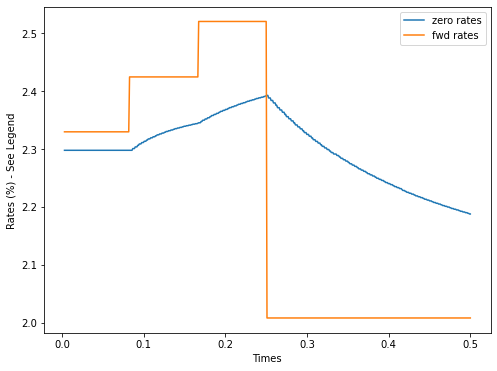

In [8]:
plotCurve(settlement_date, 0.5)

The shape of the forwards is an artifact of the piecewise flat interpolation scheme and the fact that Actual 360 deposit rates do not compare directly to zero rates or continuously compounded forwards.

### Piecewise Linear Forwards Interpolation

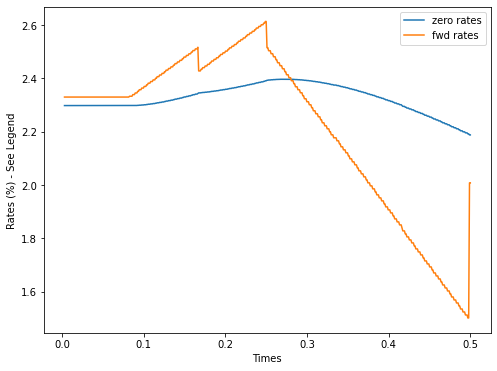

In [10]:
interpMethod = InterpTypes.LINEAR_FWD_RATES

depos = []
depo = IborDeposit(settlement_date, "1M", 0.0230, depoDCCType); depos.append(depo)
depo = IborDeposit(settlement_date, "2M", 0.0235, depoDCCType); depos.append(depo)
depo = IborDeposit(settlement_date, "3M", 0.0240, depoDCCType); depos.append(depo)
depo = IborDeposit(settlement_date, "6M", 0.0220, depoDCCType); depos.append(depo)

libor_curve = IborSingleCurve(settlement_date, depos, [], [], interpMethod)

plotCurve(settlement_date, 0.5)

### Piecewise Linear Zero Rates

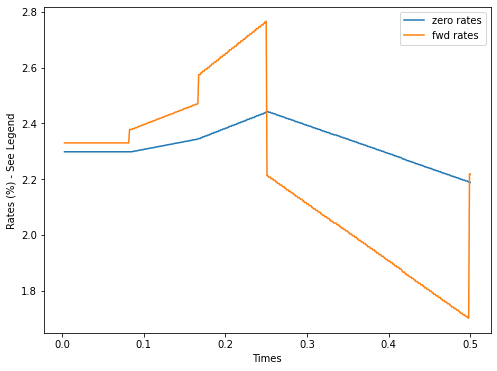

In [11]:
interpMethod = InterpTypes.LINEAR_ZERO_RATES

depos = []
depo = IborDeposit(settlement_date, "1M", 0.0230, depoDCCType); depos.append(depo)
depo = IborDeposit(settlement_date, "2M", 0.0235, depoDCCType); depos.append(depo)
depo = IborDeposit(settlement_date, "3M", 0.0245, depoDCCType); depos.append(depo)
depo = IborDeposit(settlement_date, "6M", 0.0220, depoDCCType); depos.append(depo)

libor_curve = IborSingleCurve(settlement_date, depos, [], [], interpMethod)

plotCurve(settlement_date, 0.5)

## Futures Only

Now we build a curve using just Futures contracts.

In [12]:
spot_days = 2
settlement_date = spot_date.add_weekdays(spot_days)

In [13]:
futs = []
fut = IborFuture(spot_date, 1) ; futs.append(fut)
fut = IborFuture(spot_date, 2) ; futs.append(fut)
fut = IborFuture(spot_date, 3) ; futs.append(fut)
fut = IborFuture(spot_date, 4) ; futs.append(fut)
fut = IborFuture(spot_date, 5) ; futs.append(fut)
fut = IborFuture(spot_date, 6) ; futs.append(fut)

Given a futures price and a convexity adjustent, we can convert these to FRAs

In [14]:
fras = [None]*len(futs)
fras[0] = futs[0].to_fra(97.6675,-0.00005)
fras[1] = futs[1].to_fra(97.5200,-0.00060)
fras[2] = futs[2].to_fra(97.3550,-0.00146)
fras[3] = futs[3].to_fra(97.2450,-0.00263)
fras[4] = futs[4].to_fra(97.1450,-0.00411)
fras[5] = futs[5].to_fra(97.0750,-0.00589)

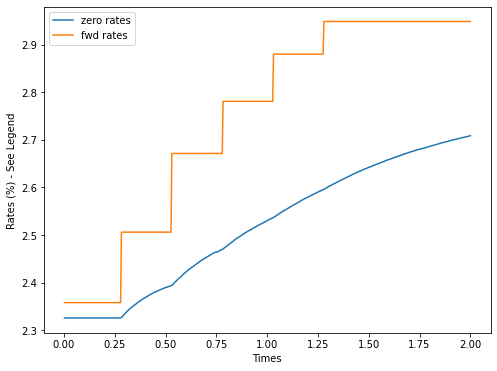

In [15]:
libor_curve = IborSingleCurve(settlement_date, [], fras, [])

plotCurve(settlement_date, 2)

We see that the forward rates are piecewise flat and increasing.

Copyright (c) 2020 Dominic O'Kane